In [51]:
# A dataset concerning restaurant reviews was selected from Kaggle

import pandas as pd
 
reviews_df = pd.read_csv('/Applications/Restaurant_Reviews.tsv', sep='\t')
 
print(reviews_df)

                                                                                                  Review  \
0                                                                               Wow... Loved this place.   
1                                                                                     Crust is not good.   
2                                                              Not tasty and the texture was just nasty.   
3                Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                            The selection on the menu was great and so were the prices.   
..                                                                                                   ...   
995                                   I think food should have flavor and texture and both were lacking.   
996                                                                             Appetite instantly gone.   
997                         

In [52]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("/Applications/Restaurant_Reviews.tsv", sep='\t', header=None)
data.columns = ['body_text', 'label']

data.head()

,body_text,label
0,Review,Liked
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1


In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
# Removing special characters

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,body_text,label,body_clean
0,Review,Liked,Review
1,Wow... Loved this place.,1,Wow Loved this place
2,Crust is not good.,0,Crust is not good
3,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it


In [55]:
# Performing Tokenization

import re

def tokenize(text):
    tokens = re.split('W+', text)
    return tokens

data['body_tokenized'] = data['body_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,body_text,label,body_clean,body_tokenized
0,Review,Liked,Review,[review]
1,Wow... Loved this place.,1,Wow Loved this place,[wow loved this place]
2,Crust is not good.,0,Crust is not good,[crust is not good]
3,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,[not tasty and the texture was just nasty]
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,[stopped by during the late may bank holiday off rick steve recommendation and loved it]


In [56]:
# Removing stopwords

import nltk

stopword = nltk.corpus.stopwords.words('english')

In [57]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data['body_nostop'] = data['body_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,body_text,label,body_clean,body_tokenized,body_nostop
0,Review,Liked,Review,[review],[review]
1,Wow... Loved this place.,1,Wow Loved this place,[wow loved this place],[wow loved this place]
2,Crust is not good.,0,Crust is not good,[crust is not good],[crust is not good]
3,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,[not tasty and the texture was just nasty],[not tasty and the texture was just nasty]
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it]


In [58]:
# Stemming text

import nltk

ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_stemmed'] = data['body_nostop'].apply(lambda x: stemming(x))

data.head()

,body_text,label,body_clean,body_tokenized,body_nostop,body_stemmed
0,Review,Liked,Review,[review],[review],[review]
1,Wow... Loved this place.,1,Wow Loved this place,[wow loved this place],[wow loved this place],[wow loved this plac]
2,Crust is not good.,0,Crust is not good,[crust is not good],[crust is not good],[crust is not good]
3,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,[not tasty and the texture was just nasty],[not tasty and the texture was just nasty],[not tasty and the texture was just nasti]
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it]


In [59]:
# Lemmatizing text

import nltk
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dominicvaldiserri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_lemmatized'] = data['body_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,body_text,label,body_clean,body_tokenized,body_nostop,body_stemmed,body_lemmatized
0,Review,Liked,Review,[review],[review],[review],[review]
1,Wow... Loved this place.,1,Wow Loved this place,[wow loved this place],[wow loved this place],[wow loved this plac],[wow loved this place]
2,Crust is not good.,0,Crust is not good,[crust is not good],[crust is not good],[crust is not good],[crust is not good]
3,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,[not tasty and the texture was just nasty],[not tasty and the texture was just nasty],[not tasty and the texture was just nasti],[not tasty and the texture was just nasty]
4,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it],[stopped by during the late may bank holiday off rick steve recommendation and loved it]
5,The selection on the menu was great and so were the prices.,1,The selection on the menu was great and so were the prices,[the selection on the menu was great and so were the prices],[the selection on the menu was great and so were the prices],[the selection on the menu was great and so were the pric],[the selection on the menu was great and so were the prices]
6,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho,[now i am getting angry and i want my damn pho],[now i am getting angry and i want my damn pho],[now i am getting angry and i want my damn pho],[now i am getting angry and i want my damn pho]
7,Honeslty it didn't taste THAT fresh.),0,Honeslty it didnt taste THAT fresh,[honeslty it didnt taste that fresh],[honeslty it didnt taste that fresh],[honeslty it didnt taste that fresh],[honeslty it didnt taste that fresh]
8,The potatoes were like rubber and you could tell they had been made up ahead of time being kept ...,0,The potatoes were like rubber and you could tell they had been made up ahead of time being kept ...,[the potatoes were like rubber and you could tell they had been made up ahead of time being kept...,[the potatoes were like rubber and you could tell they had been made up ahead of time being kept...,[the potatoes were like rubber and you could tell they had been made up ahead of time being kept...,[the potatoes were like rubber and you could tell they had been made up ahead of time being kept...
9,The fries were great too.,1,The fries were great too,[the fries were great too],[the fries were great too],[the fries were great too],[the fries were great too]


In [61]:
# Prepping for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

import warnings 
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('/Applications/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [63]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [64]:
# EDA 
# Sentiment Distribution

Labels = pd.DataFrame(data['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked', 'Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative', 1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title = 'Review distribution as a percentage', hole = .4, color = 'Liked',
             width = 800, height = 400)
fig.show()

In [65]:
positive_reviews = data[data["Liked"] == 1]

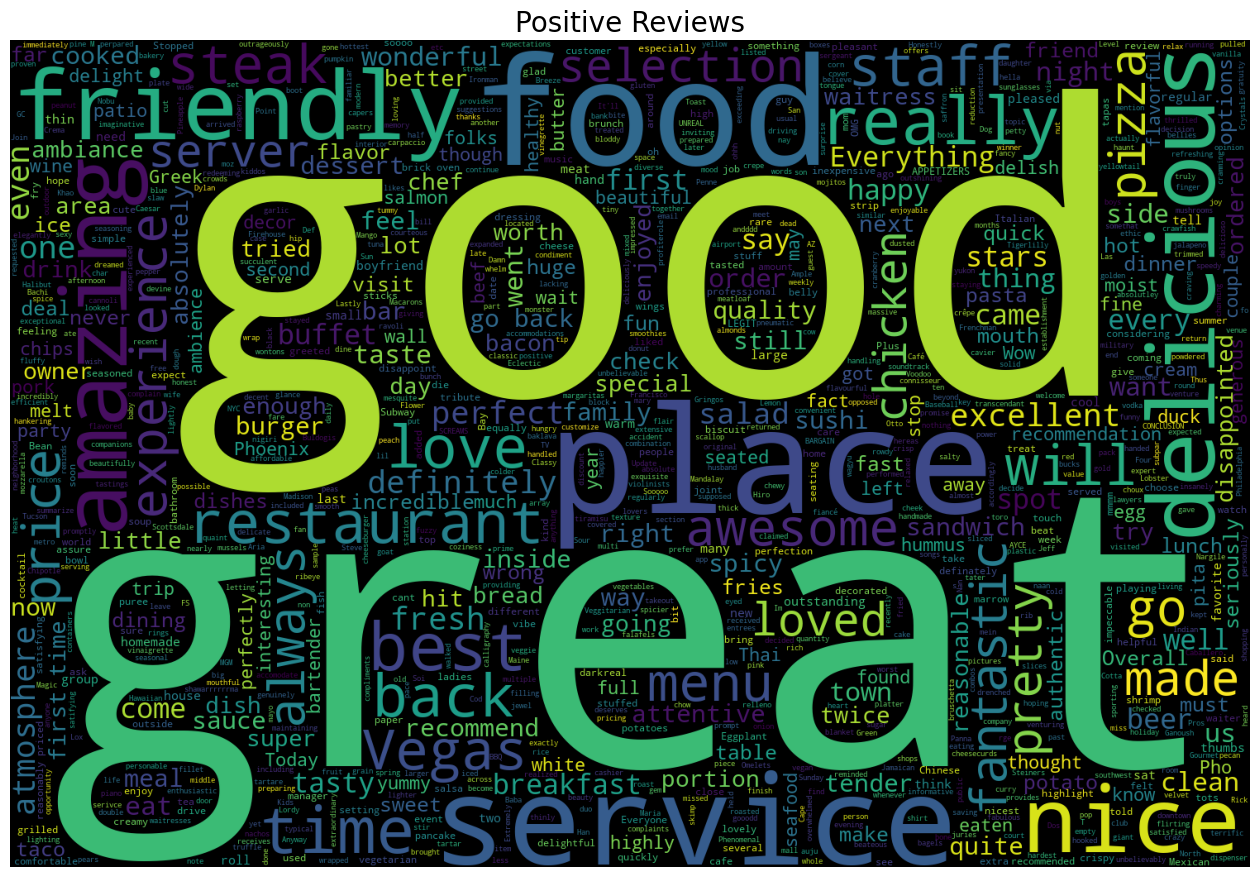

In [66]:
plt.subplots(figsize = (16, 13))
wordcloud = WordCloud(background_color = 'black', max_words = 1000, 
                      width = 1500, stopwords = STOPWORDS, 
                      height = 1000
                     ).generate(" ".join(positive_reviews.Review))
plt.title("Positive Reviews", fontsize = 20)
plt.imshow(wordcloud.recolor(colormap = 'viridis'))
plt.axis('off')
plt.show()

In [67]:
negative_reviews = data[data["Liked"] == 0]

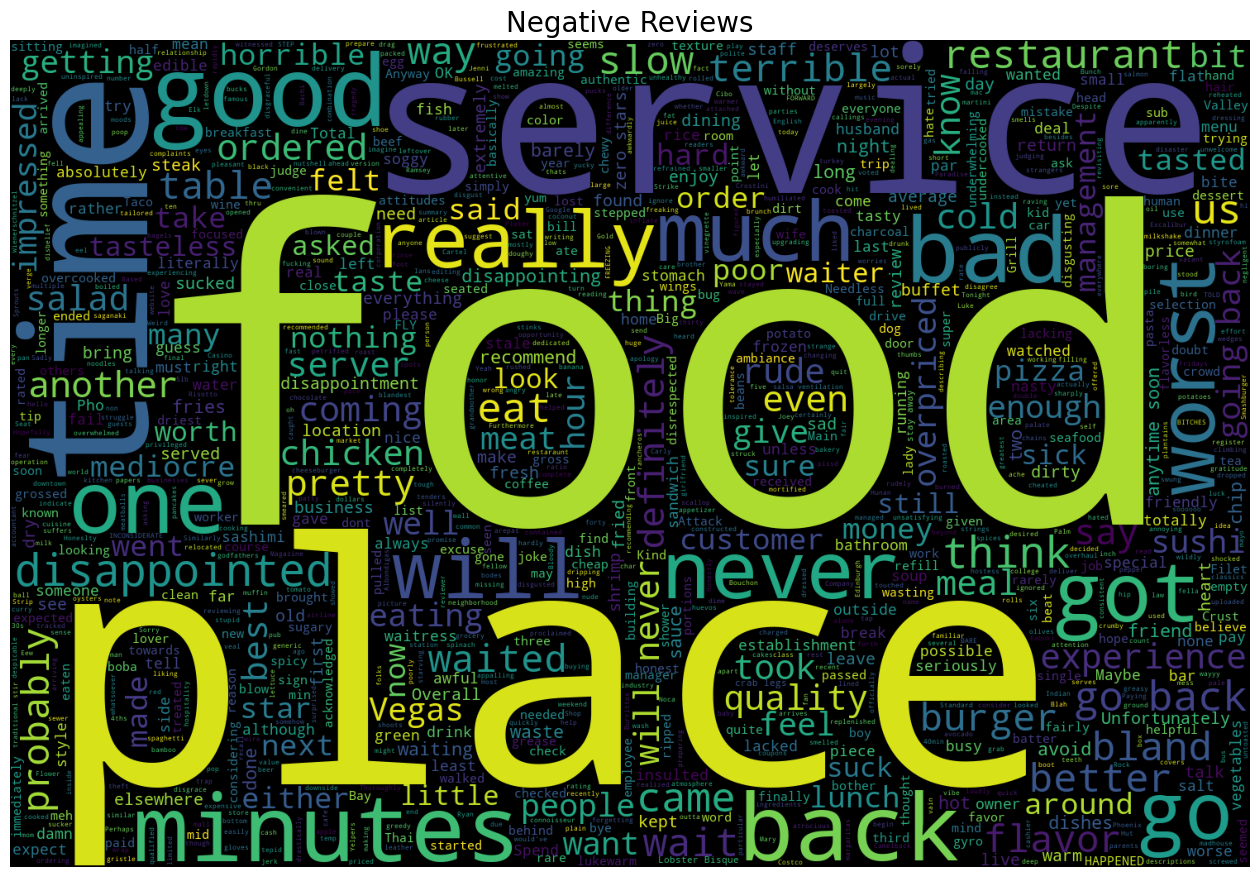

In [68]:
plt.subplots(figsize = (16, 13))
wordcloud = WordCloud(background_color = 'black', max_words = 1000, 
                      width = 1500, stopwords = STOPWORDS, 
                      height = 1000
                     ).generate(" ".join(negative_reviews.Review))
plt.title("Negative Reviews", fontsize = 20)
plt.imshow(wordcloud.recolor(colormap = 'viridis'))
plt.axis('off')
plt.show()

In [69]:
# IDF

import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("/Applications/Restaurant_Reviews.tsv", sep = '\t')
data.columns = ['body_text', 'label']

In [70]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [71]:
# Applying TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(1000, 1699)
['' '1' '10' ... 'yum' 'yummi' 'zero']


In [72]:
# Applying TF-IDF to smaller sample

data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 84)
['a' 'ahead' 'alon' 'angri' 'back' 'bank' 'cape' 'care' 'cash' 'cashier'
 'chicken' 'cod' 'could' 'cranberrymmmm' 'crust' 'damn' 'didnt' 'disgust'
 'end' 'ever' 'fresh' 'fri' 'get' 'go' 'good' 'great' 'hair' 'highli'
 'holiday' 'honeslti' 'human' 'i' 'indic' 'kept' 'late' 'let' 'like'
 'littl' 'love' 'made' 'may' 'menu' 'nasti' 'not' 'now' 'overpr' 'pho'
 'place' 'potato' 'pretti' 'price' 'prompt' 'ravoli' 'recommend' 'rick'
 'rubber' 'say' 'select' 'servic' 'shock' 'sign' 'slow' 'steve' 'still'
 'stop' 'sure' 'tast' 'tasti' 'tell' 'textur' 'that' 'the' 'thi' 'time'
 'touch' 'tri' 'vega' 'waitress' 'want' 'warmer' 'wayyy' 'worth' 'would'
 'wow']


In [73]:
# Creating array from sparse matrix

X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

,a,ahead,alon,angri,back,bank,cape,care,cash,cashier,...,touch,tri,vega,waitress,want,warmer,wayyy,worth,would,wow
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.626798
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.342086,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.357889,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.357889,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.315076,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.315076,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.616729,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.616729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [74]:
# Feature Engineering
# Creating feature for review length

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count (" "))

data.head()

,body_text,label,body_len
0,Wow... Loved this place.,1,21
1,Crust is not good.,0,15
2,Not tasty and the texture was just nasty.,0,34
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,73
4,The selection on the menu was great and so were the prices.,1,48


In [75]:
# Creating feature for % of review that is punctuation

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count (" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,body_text,label,body_len,punct%
0,Wow... Loved this place.,1,21,19.0
1,Crust is not good.,0,15,6.7
2,Not tasty and the texture was just nasty.,0,34,2.9
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,73,1.4
4,The selection on the menu was great and so were the prices.,1,48,2.1


array([[<Axes: title={'center': 'body_len'}>,
        <Axes: title={'center': 'punct%'}>]], dtype=object)

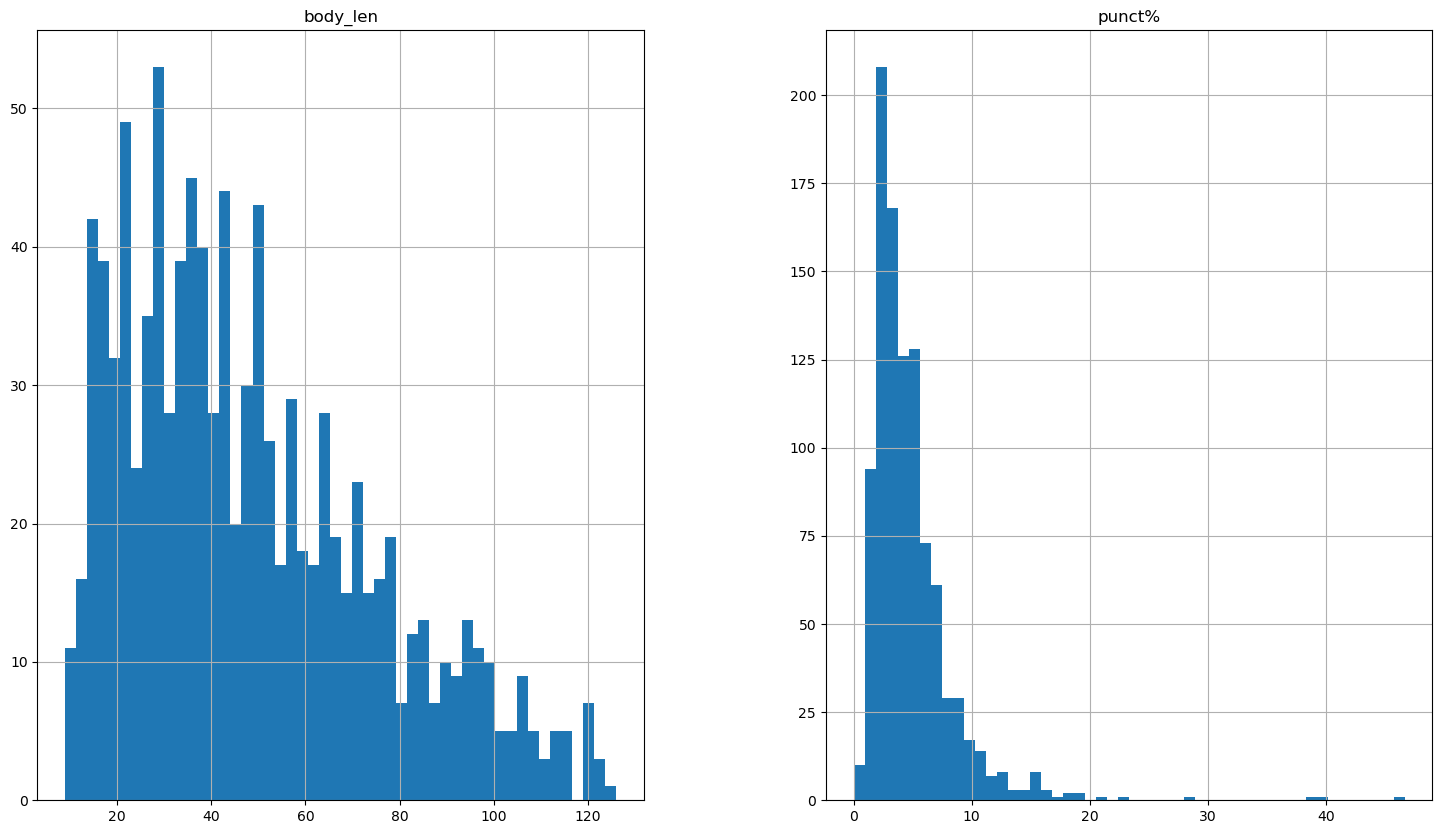

In [76]:
# Creating histograms to evaluate features

data.hist(['body_len', 'punct%'], figsize=(18,10), bins = 50)

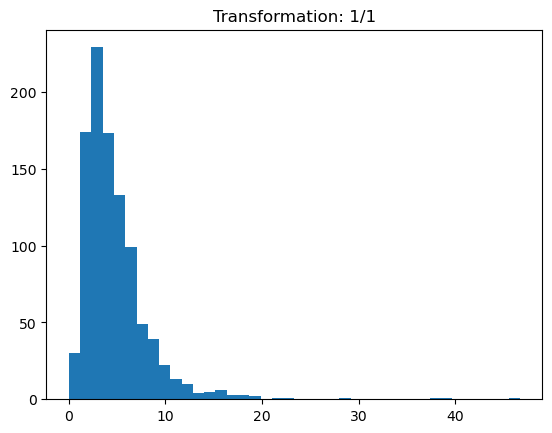

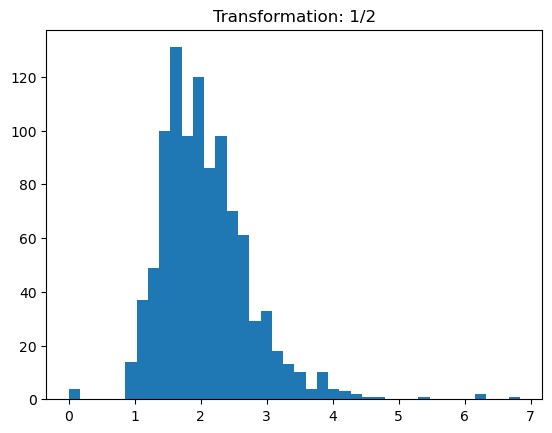

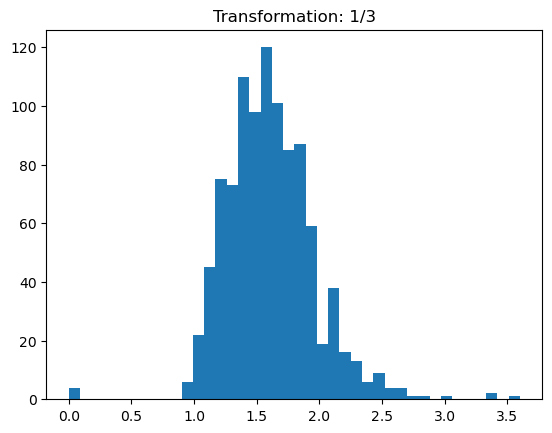

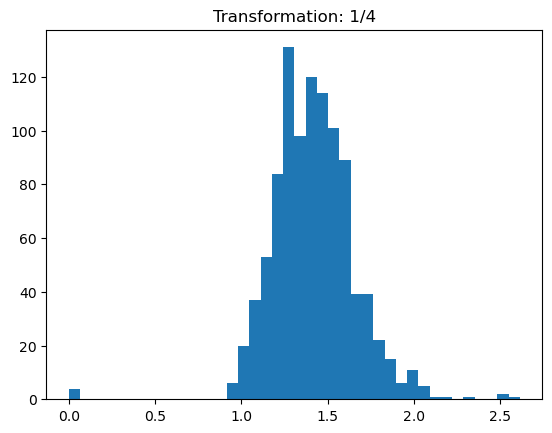

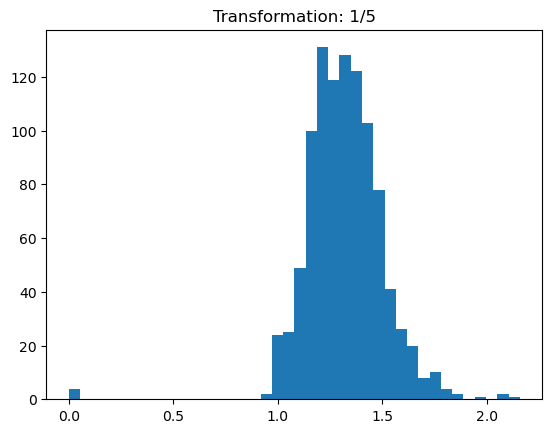

In [77]:
# Power transformation for cleaner data

from matplotlib import pyplot
import numpy as np
%matplotlib inline

for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

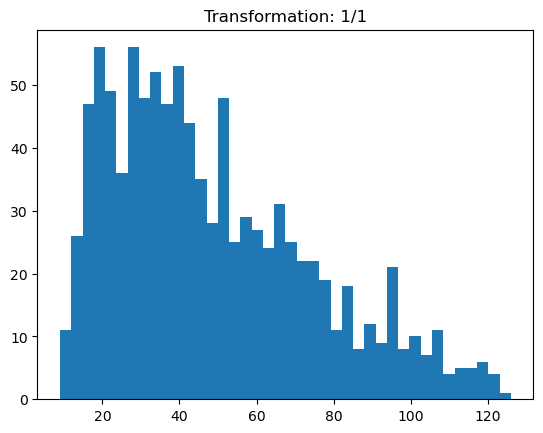

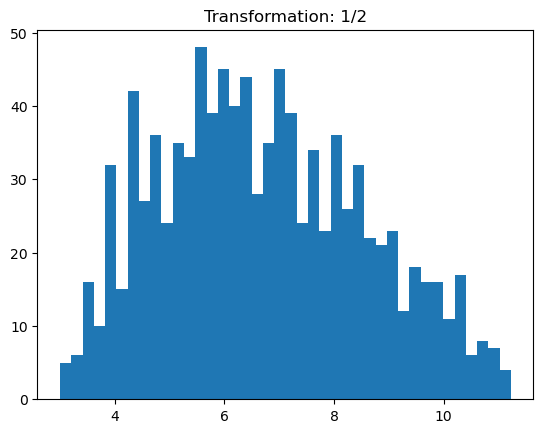

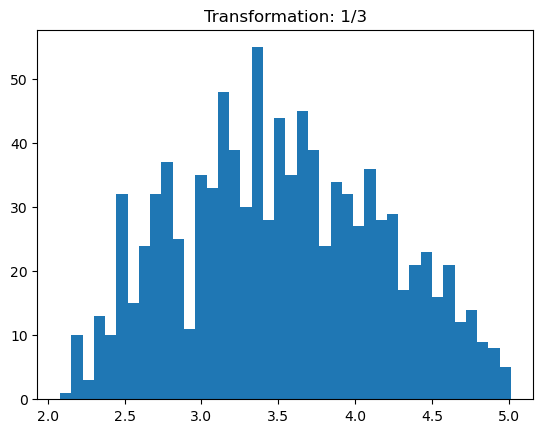

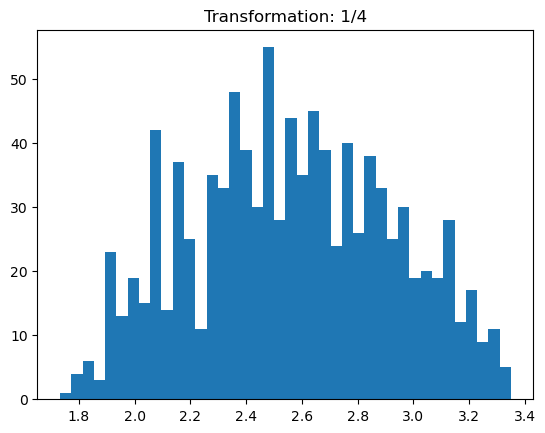

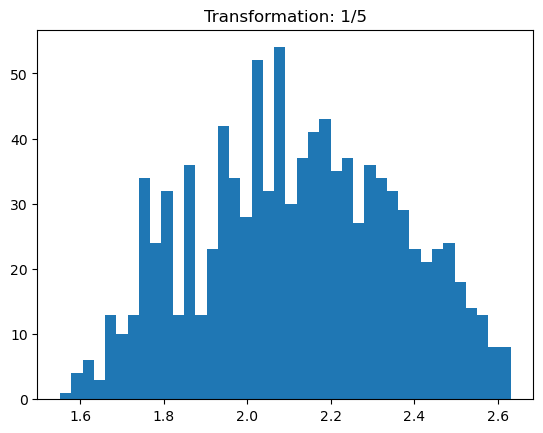

In [78]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['body_len'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()